In [34]:
using Random
using Statistics, Distributions, GLM
using Plots
using DataFrames
using Measures

theme(:ggplot2)

In [ ]:
Random.seed!(123)  # Para reprodutibilidade

anos = 1980:2019
n = length(anos)

# Temperatura simulada com leve tendência de aumento
temperatura = 24 .+ 0.02 .* (1:n) .+ randn(n) .* 0.3

40-element Vector{Float64}:
 24.26248637853949
 23.703378247565748
 23.72860916930121
 23.95490220945052
 24.186276394187157
 24.188945609415562
 24.013469400680094
 23.75332281366964
 24.20083774232757
 24.164803158640755
  ⋮
 24.837891385691446
 24.769396425885088
 24.9157742401175
 24.751191363559727
 24.33329367874379
 25.02111721320825
 24.912425732909867
 24.10507805156606
 24.837590472042102

In [ ]:
function mann_kendall_test(x)
    n = length(x)
    S = 0
    for k in 1:n-1
        for j in k+1:n
            S += sign(x[j] - x[k])
        end
    end
    var_s = n*(n-1)*(2n+5)/18
    Z = S > 0 ? (S - 1)/sqrt(var_s) : S < 0 ? (S + 1)/sqrt(var_s) : 0
    p = 2 * (1 - cdf(Normal(0,1), abs(Z)))  # Valor-p bilateral
    return S, Z, p
end

mann_kendall_test (generic function with 1 method)

In [ ]:
S, Z, p = mann_kendall_test(temperatura)

println("Resultado do Teste de Mann-Kendall:")
println("S = $S")
println("Z = $(round(Z, digits=3))")
println("Valor-p = $(round(p, digits=4))")

if p < 0.05
    println("→ Tendência significativa detectada (nível de 5%).")
else
    println("→ Não há tendência significativa detectada.")
end

Resultado do Teste de Mann-Kendall:
S = 370.0
Z = 4.299
Valor-p = 0.0
→ Tendência significativa detectada (nível de 5%).


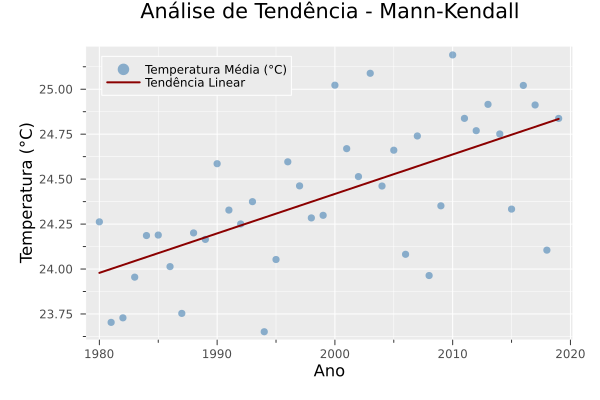

In [40]:
# Criar DataFrame para o ajuste do modelo
df = DataFrame(
    Temperatura = temperatura,
    Ano = anos)

# Plot com tendência linear e margens ajustadas
plot(anos, temperatura, 
    seriestype = :scatter, 
    label = "Temperatura Média (°C)", 
    xlabel = "Ano", 
    ylabel = "Temperatura (°C)", 
    title = "Análise de Tendência - Mann-Kendall", 
    color = :steelblue, 
    alpha = 0.6,
    left_margin = 5mm,    # Margem esquerda para o ylabel
    bottom_margin = 5mm,  # Margem inferior para o xlabel
    top_margin = 5mm,     # Margem superior para o título
    right_margin = 5mm,   # Margem direita para a legenda
    size = (600, 400)      # Tamanho total do plot
)

# Ajuste e plot da linha de tendência
modelo = lm(@formula(Temperatura ~ Ano), df)
plot!(anos, predict(modelo), 
    label = "Tendência Linear", 
    color = :darkred, 
    linewidth = 2
)